#### OM NAMO NARAYANA

**Reference implementation** : https://www.analyticsvidhya.com/blog/2020/08/top-4-sentence-embedding-techniques-using-python/ 

In [1]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import numpy as np

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
import pandas as pd
import random
import numpy as np
import math
from tqdm import tqdm

## Dataset preparation

We use NLTK for word tokenizers

#### Desired format

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dataset_dir = '/content/drive/My Drive/thirukkural_meanings.json'


In [5]:
# dataset_dir = 'H:/sem8/nlp/proof-of-concept/Motivational Quotes Database.csv'


# df = pd.read_csv(dataset_dir)
# df.head()



df = pd.DataFrame([
 {
    'text': 'If one is easy of access to all, it will be easy for one to obtain the virtue called goodness',
    'id': 991
},
  {
    'text': 'Affectionateness and birth in a good family, these two constitute what is called a proper behaviour to all',
    'id': 992
},
  {
    'text': 'Resemblance of bodies is no resemblance of souls; true resemblance is the resemblance of qualities that attract',
    'id': 993
},
 ])

df.head()

,text,id
0,"If one is easy of access to all, it will be ea...",991
1,"Affectionateness and birth in a good family, t...",992
2,Resemblance of bodies is no resemblance of sou...,993


In [6]:
df = pd.read_json(dataset_dir)
df=df.T
df["text"]=df["explanation"]
del df["explanation"]
df=df.sort_index()
df.head(1330)

,id,text
1,1,As all letters have the letter A for their fi...
2,2,"What Profit have those derived from learning,..."
3,3,They who are united to the glorious feet of H...
4,4,To those who meditate the feet of Him who is ...
5,5,The two-fold deeds that spring from darkness ...
...,...,...
1326,1326,To digest what has been eaten is more delight...
1327,1327,Those are conquerors whose dislike has been d...
1328,1328,"Will I enjoy once more through her dislike, t..."
1329,1329,"May the bright-jewelled one feign dislike, an..."


In [7]:
sentences = df['text'].to_list()
sentences[:2]

[' As all letters have the letter A for their first, so the world has the eternalGod for its first. ',
 ' What Profit have those derived from learning, who worship not the good feet of Him who is possessed of pure knowledge ?. ']

In [8]:
tokenized_sent = []
for s in tqdm(sentences):
    tokenized_sent.append(word_tokenize(s.lower()))
print(*tokenized_sent[1:3])

100%|██████████| 1328/1328 [00:00<00:00, 2438.58it/s]

['what', 'profit', 'have', 'those', 'derived', 'from', 'learning', ',', 'who', 'worship', 'not', 'the', 'good', 'feet', 'of', 'him', 'who', 'is', 'possessed', 'of', 'pure', 'knowledge', '?', '.'] ['they', 'who', 'are', 'united', 'to', 'the', 'glorious', 'feet', 'of', 'him', 'who', 'occupies', 'swiftly', 'the', 'flower', 'of', 'the', 'mind', ',', 'shall', 'flourish', 'in', 'the', 'highest', 'of', 'worlds', '(', 'heaven', ')', '.']


In [9]:
from scipy.spatial import distance

## Doc2Vec

**documentation** : https://radimrehurek.com/gensim/models/doc2vec.html

**demonstration** : https://radimrehurek.com/gensim/auto_examples/tutorials/run_doc2vec_lee.html#sphx-glr-auto-examples-tutorials-run-doc2vec-lee-py <br/>

- We train the model from scratch here
- Unsupervised algorithm
- Continuous Bag of words type and skip gram type

For each token (sentence) from tokenizer, we assign an index to the sentence

In [10]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
tagged_data = [TaggedDocument(d, [i]) for i, d in enumerate(tokenized_sent)]
tagged_data[:2]

[TaggedDocument(words=['as', 'all', 'letters', 'have', 'the', 'letter', 'a', 'for', 'their', 'first', ',', 'so', 'the', 'world', 'has', 'the', 'eternalgod', 'for', 'its', 'first', '.'], tags=[0]),
 TaggedDocument(words=['what', 'profit', 'have', 'those', 'derived', 'from', 'learning', ',', 'who', 'worship', 'not', 'the', 'good', 'feet', 'of', 'him', 'who', 'is', 'possessed', 'of', 'pure', 'knowledge', '?', '.'], tags=[1])]

In [11]:
# workers=2 works fastest
model = Doc2Vec(vector_size = 20, window = 2, min_count = 2, epochs = 10, workers=2)

model.build_vocab(tagged_data)

%time model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

'''
vector_size = Dimensionality of the feature vectors.
window = The maximum distance between the current and predicted word within a sentence.
min_count = Ignores all words with total frequency lower than this.
alpha = The initial learning rate.
'''

## Print model vocabulary
words = list(model.wv.vectors)
print(len(words))
print(words[:2])


CPU times: user 1.42 s, sys: 40.1 ms, total: 1.46 s
Wall time: 1.73 s
1747
[array([-1.2261385 , -1.2727249 ,  0.5574881 ,  0.16814923, -1.0503249 ,
        0.58720744,  0.93093175,  0.239874  ,  0.70402753,  0.81207347,
       -0.47315875,  0.7822459 , -1.0459242 ,  1.2993703 , -0.12608936,
        0.0725823 , -0.762301  , -1.0160161 ,  0.38447708,  0.46634054],
      dtype=float32), array([-1.2894785 , -1.3748136 ,  0.62115157,  0.24529158, -1.2061409 ,
        0.6413265 ,  0.9119461 ,  0.26486614,  0.73570365,  1.0080663 ,
       -0.512822  ,  0.9489489 , -1.1351235 ,  1.3494412 , -0.1254325 ,
       -0.01850284, -0.7394296 , -1.0535076 ,  0.36292037,  0.4767672 ],
      dtype=float32)]


In [12]:
query = "Education is the need of the hour"
test_doc = word_tokenize(query.lower())
test_doc_vector = model.infer_vector(test_doc)
print(test_doc_vector)
model.dv = model.__dict__['docvecs']
x = model.dv.most_similar(positive = [test_doc_vector], topn=5)
print(x)

[-0.09092174 -0.09272013  0.03391967  0.0179482  -0.06388233  0.05083742
  0.07785894  0.01711782  0.04607085  0.04409826 -0.02143299  0.07281349
 -0.08263877  0.0978265   0.01322128  0.00914847 -0.0683472  -0.08864942
  0.01139247  0.03134623]
[(1071, 0.9867056012153625), (43, 0.9860166311264038), (29, 0.985938310623169), (1229, 0.9855760931968689), (734, 0.9855452179908752)]


In [13]:
index = [sentences[j] for j in [i[0] for i in x]]
# index = [i[0] for i in x]
print('query:', query )
print('results:')
for y in index:
    print(y)

query: Education is the need of the hour
results:
 The base feels proud when he sees persons whose acts meaner than his own. 
 His descendants shall never fail who, living in the domestic state, fears vice (in the acquisition of property) and shares his food (with others). 
 The virtuous are truly called Anthanar; because in their conduct towards all creatures they are clothed in kindness. 
 The discoloured eyes that shed tears profusely seem to betray the unkindness of our beloved. 
 The constituents of a kingdom are the two waters (from above and below), well situated hills and an undestructible fort. 


using KMeans to interpret the result

In [14]:
from sklearn.cluster import KMeans, AffinityPropagation, SpectralClustering
import matplotlib.pyplot as plt

1328 [0 0 1 ... 0 0 0]


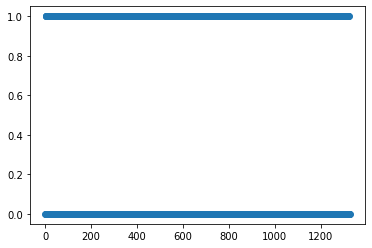

In [15]:
kurals_list = [word_tokenize(sent.lower()) for sent in sentences]
# print(kurals_list)
test_doc_vector =[model.infer_vector(kural_list) for kural_list in kurals_list]
# print(test_doc_vector[:2])
kmeans = KMeans(n_clusters=2, random_state=0).fit(test_doc_vector)
print(len(kmeans.labels_), kmeans.labels_)
plt.scatter(range(len(kmeans.labels_)), kmeans.labels_)

In [16]:
!pip install sentence_transformers transformers

     |████████████████████████████████| 79 kB 5.5 MB/s 
     |████████████████████████████████| 3.5 MB 40.5 MB/s 
     |████████████████████████████████| 1.2 MB 36.9 MB/s 
     |████████████████████████████████| 67 kB 2.4 MB/s 
     |████████████████████████████████| 895 kB 38.2 MB/s 
     |████████████████████████████████| 6.8 MB 38.5 MB/s 
     |████████████████████████████████| 596 kB 42.3 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=764d1f7b1746037e45c660ce99bc8ad07a4814580fb2c80f8b0bc18880f0dbb7
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


## SentenceBERT

**Reference**: https://www.sbert.net/

- We import and use the pre-trained mode
- Here we don't train the model

In [17]:
from sentence_transformers import SentenceTransformer
%time sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

CPU times: user 17.2 s, sys: 2.97 s, total: 20.2 s
Wall time: 30.2 s


In [18]:
%time sentence_embeddings = sbert_model.encode(sentences[:2000])

CPU times: user 2min 42s, sys: 3.56 s, total: 2min 45s
Wall time: 2min 55s


In [19]:
query = "God is Great"
query_vec = sbert_model.encode([query])[0]

In [20]:
topn = min(5, len(sentences))
n = min(2000, len(sentences))

sim = []
for sent in tqdm(random.sample(sentences, n)):
  sim.append(distance.cosine(query_vec, sbert_model.encode([sent])[0]))
#   print("Sentence = ", sent, "; similarity = ", sim)
ind = np.argpartition(sim, -topn)[-topn:]
print(np.array(sentences)[ind])

100%|██████████| 1328/1328 [03:02<00:00,  7.28it/s]

[' He is a king who having equitably examined (any injustice which has been brought to his notice), suitably punishes it, so that it may not be again committed. '
 ' Let the king fight and gain (victories); (but) let me be united to my wife and feast the evening. '
 ' The world is theirs (kings) who are able to show kindness, without injury to their affairs, (administration of justice). '
 ' Although they may have great (natural) goodness of mind, yet good society will tend to strengthen it. '
 ' Those who have been friends and have afterwards forsaken him, will return and join themselves (to him), when the cause of disagreement is not to be found in him. ']


1328 [4 9 4 ... 7 7 5]


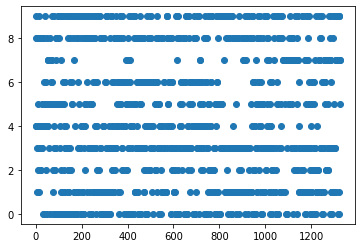

In [21]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(sentence_embeddings)
print(len(kmeans.labels_), kmeans.labels_)
plt.scatter(range(len(kmeans.labels_)), kmeans.labels_)

## InferSent

In [22]:
import os
os.getcwd()

'/content'

In [26]:
import os

# encoder_dir = 'H:/sem8/nlp/proof-of-concept/'
encoder_dir = os.getcwd() + '/'
base_dir = os.getcwd() + '/'

os.chdir(encoder_dir)

if(os.path.isdir(encoder_dir + 'encoder')  == False):
    ! mkdir encoder
else:
    print('A subdirectory already exists.')
! curl -Lo encoder/infersent2.pkl https://dl.fbaipublicfiles.com/infersent/infersent2.pkl

if(os.path.isdir(encoder_dir + 'Glove')  == False):
    ! mkdir GloVe
else:
    print('A subdirectory already exists.')
! curl -Lo GloVe/glove.840B.300d.zip http://nlp.stanford.edu/data/glove.840B.300d.zip
! unzip GloVe/glove.840B.300d.zip -d GloVe/

A subdirectory already exists.
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  146M  100  146M    0     0  26.4M      0  0:00:05  0:00:05 --:--:-- 34.0M
mkdir: cannot create directory ‘GloVe’: File exists
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0   315    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0   352    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 2075M  100 2075M    0     0  4890k      0  0:07:14  0:07:14 --:--:-- 5650k
Archive:  GloVe/glove.840B.300d.zip
  inflating: GloVe/glove.840B.300d.txt  


In [31]:
!pip install models
# ! python --version

  Using cached models-0.9.3.tar.gz (16 kB)
  Using cached models-0.9.2.tar.gz (16 kB)
  Using cached models-0.9.1.tar.gz (16 kB)
  Using cached models-0.9.0.tar.gz (14 kB)
  Using cached models-0.8.0.tar.gz (14 kB)
  Using cached models-0.7.0.tar.gz (14 kB)
  Using cached models-0.4.0.tar.gz (11 kB)
  Using cached models-0.3.0.tar.gz (11 kB)
  Using cached models-0.2.0.tar.gz (11 kB)
  Using cached models-0.1.1.tar.gz (11 kB)
  Using cached models-0.1.0.tar.gz (11 kB)
  Using cached models-0.0.5.tar.gz (6.4 kB)
  Using cached models-0.0.4.tar.gz (6.1 kB)
  Using cached models-0.0.3.tar.gz (6.2 kB)
ERROR: Could not find a version that satisfies the requirement models (from versions: 0.0.3, 0.0.4, 0.0.5, 0.1.0, 0.1.1, 0.2.0, 0.3.0, 0.4.0, 0.7.0, 0.8.0, 0.9.0, 0.9.1, 0.9.2, 0.9.3)
ERROR: No matching distribution found for models


In [28]:
from models import InferSent
import torch

V = 2
# base_path = 'H:/sem8/nlp/proof-of-concept/'
base_path = base_dir
MODEL_PATH = base_path + 'encoder/infersent%s.pkl' % V
params_model = {'bsize': 64, 'word_emb_dim': 300, 'enc_lstm_dim': 2048,
                'pool_type': 'max', 'dpout_model': 0.0, 'version': V}
model = InferSent(params_model)
model.load_state_dict(torch.load(MODEL_PATH))

W2V_PATH = base_path + '/GloVe/glove.840B.300d.txt'
model.set_w2v_path(W2V_PATH)

ModuleNotFoundError: ignored

In [ ]:
%time model.build_vocab(sentences, tokenize=True)

In [ ]:
query = "Life is very short nanba, always be happy. Design Design a problems will come and go don't worry"
query_vec = model.encode(query)[0]
query_vec

In [ ]:
topn = min(len(sentences), 10)
n = min(len(sentences), 100)

similarity = []
sim = []

for sent in tqdm(random.sample(sentences, n)):
  sim.append(distance.cosine(query_vec, model.encode([sent])[0]))
ind = np.argpartition(sim, -topn)[-topn:]
print(np.array(sentences)[ind])

In [ ]:
infernet_sentence_embeddings = [model.encode(sent) for sent in sentences]
means = KMeans(n_clusters=10, random_state=0).fit(infernet_sentence_embeddings)
print(len(kmeans.labels_), kmeans.labels_)
plt.scatter(range(len(kmeans.labels_)), kmeans.labels_)

In [ ]:
clustering = SpectralClustering(n_clusters=10, assign_labels='discretize', random_state=0).fit(infernet_sentence_embeddings)
# means = KMeans(n_clusters=10, random_state=0).fit(infernet_sentence_embeddings)
print(len(clustering.labels_), clustering.labels_)
plt.scatter(range(len(clustering.labels_)), clustering.labels_)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
fig, ax = plt.subplots(figsize =(16, 9))
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
ax.barh([x[:30] + '...' for x in np.array(sentences)[ind]], np.array(sim)[ind])
ax.invert_yaxis()
plt.show()

Reference: [link](https://github.com/gotorehanahmad/Natural-Language-Processing/blob/master/NLI/Infersent.ipynb)

In [ ]:
!pip install bertviz

## Universal Sentence Encoder

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np